In [1]:
import numpy as np
import pandas as pd
from keras import models, layers

import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
import json
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

In [2]:
df = pd.read_csv('../data/datasets/training_data_small_track.csv')
print(f'{df.shape=}')
df.sample(5)

df.shape=(2970, 19)


,steering_angle,waypoint1_lat,waypoint1_lon,waypoint2_lat,waypoint2_lon,waypoint3_lat,waypoint3_lon,waypoint4_lat,waypoint4_lon,waypoint5_lat,waypoint5_lon,waypoint6_lat,waypoint6_lon,waypoint7_lat,waypoint7_lon,waypoint8_lat,waypoint8_lon,waypoint9_lat,waypoint9_lon
1196,-0.2,-1.696654e+00,-1.664960,-3.706410,-4.403517,-5.641161,-7.199159,-7.253857,-10.191379,-8.853187,-13.191707,-10.452517,-16.192035,-12.051828,-19.192343,-13.618446,-22.208818,-14.198642,-25.509719
1886,0.0,-1.108503e+00,-2.105770,-1.865057,-5.379514,-0.528051,-8.437054,2.177910,-10.452122,5.420341,-11.455294,8.759994,-12.091768,12.129042,-12.494753,15.526864,-12.611740,18.916773,-12.472654
104,0.0,3.136035e-02,1.699007,0.608737,5.045947,1.289710,8.377032,1.970702,11.708134,2.651655,15.039195,3.298992,18.376054,2.891591,21.696883,0.570826,24.115102,-2.610738,25.233999
70,0.0,6.407263e-07,0.339997,0.143441,3.732636,0.813053,7.065289,1.494006,10.396346,2.174999,13.727451,2.855971,17.058531,3.383649,20.412092,2.359315,23.584894,-0.327535,25.616529
2464,0.0,1.677611e+00,-0.267810,5.074125,-0.404306,8.471668,-0.464049,11.677761,0.493707,13.613599,3.211936,13.634929,6.668809,13.643626,10.068613,14.175608,13.421676,14.856568,16.752737


In [3]:
X = df.drop(columns=['steering_angle'])
y = df['steering_angle']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

X_train.shape, X_test.shape, y_train.shape, y_test.shape

((2376, 18), (594, 18), (2376,), (594,))

In [4]:
from keras.models import Sequential
from keras.layers import Dense, BatchNormalization, Activation
from keras.optimizers import Adam
from keras.callbacks import ModelCheckpoint
from datetime import datetime

model = Sequential([
    BatchNormalization(input_shape=(X_train.shape[1],)),
    Dense(512, activation='relu'),
    Dense(256, activation='relu'),
    Dense(128, activation='relu'),
    Dense(64, activation='relu'),
    Dense(1)
])


timestamp = datetime.now().strftime('%Y%m%d_%H%M%S')
checkpoint = ModelCheckpoint(f'../weights/best_NN_{timestamp}.h5', monitor='val_loss', save_best_only=True, mode='min')

model.compile(optimizer=Adam(learning_rate=0.001), loss='mse', metrics=['mae'])

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 batch_normalization (BatchN  (None, 18)               72        
 ormalization)                                                   
                                                                 
 dense (Dense)               (None, 512)               9728      
                                                                 
 dense_1 (Dense)             (None, 256)               131328    
                                                                 
 dense_2 (Dense)             (None, 128)               32896     
                                                                 
 dense_3 (Dense)             (None, 64)                8256      
                                                                 
 dense_4 (Dense)             (None, 1)                 65        
                                                        

In [5]:
EPOCHS = 20
history = model.fit(
    X_train, y_train,
    validation_data=(X_test, y_test),
    epochs=EPOCHS,
    batch_size=32,
    callbacks=[checkpoint],
    verbose=1
)

Epoch 1/20
75/75 [==============================] - 4s 14ms/step - loss: 0.0078 - mae: 0.0665 - val_loss: 0.0107 - val_mae: 0.0839
Epoch 2/20
75/75 [==============================] - 1s 8ms/step - loss: 0.0047 - mae: 0.0518 - val_loss: 0.0033 - val_mae: 0.0412
Epoch 3/20
75/75 [==============================] - 1s 10ms/step - loss: 0.0040 - mae: 0.0481 - val_loss: 0.0035 - val_mae: 0.0440
Epoch 4/20
75/75 [==============================] - 1s 9ms/step - loss: 0.0034 - mae: 0.0443 - val_loss: 0.0035 - val_mae: 0.0429
Epoch 5/20
75/75 [==============================] - 1s 10ms/step - loss: 0.0031 - mae: 0.0415 - val_loss: 0.0021 - val_mae: 0.0356
Epoch 6/20
75/75 [==============================] - 1s 8ms/step - loss: 0.0033 - mae: 0.0432 - val_loss: 0.0027 - val_mae: 0.0391
Epoch 7/20
75/75 [==============================] - 1s 8ms/step - loss: 0.0031 - mae: 0.0419 - val_loss: 0.0035 - val_mae: 0.0412
Epoch 8/20
75/75 [==============================] - 1s 12ms/step - loss: 0.0031 - mae: 

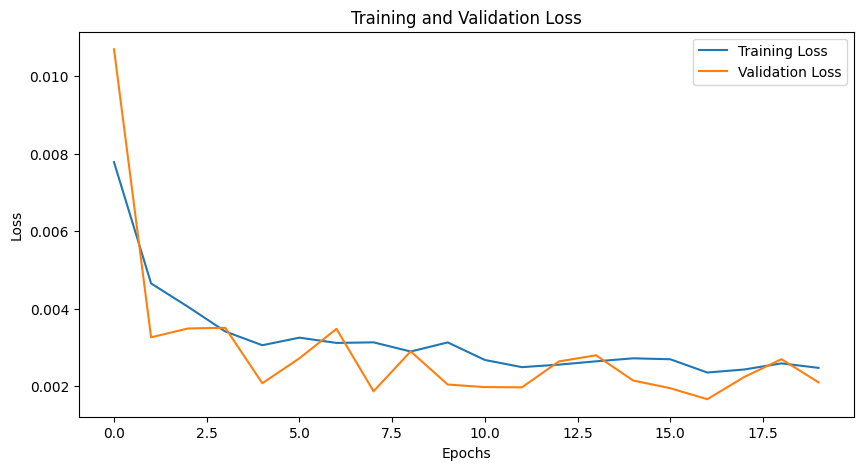

In [6]:
plt.figure(figsize=(10, 5))
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.title('Training and Validation Loss')
plt.show()

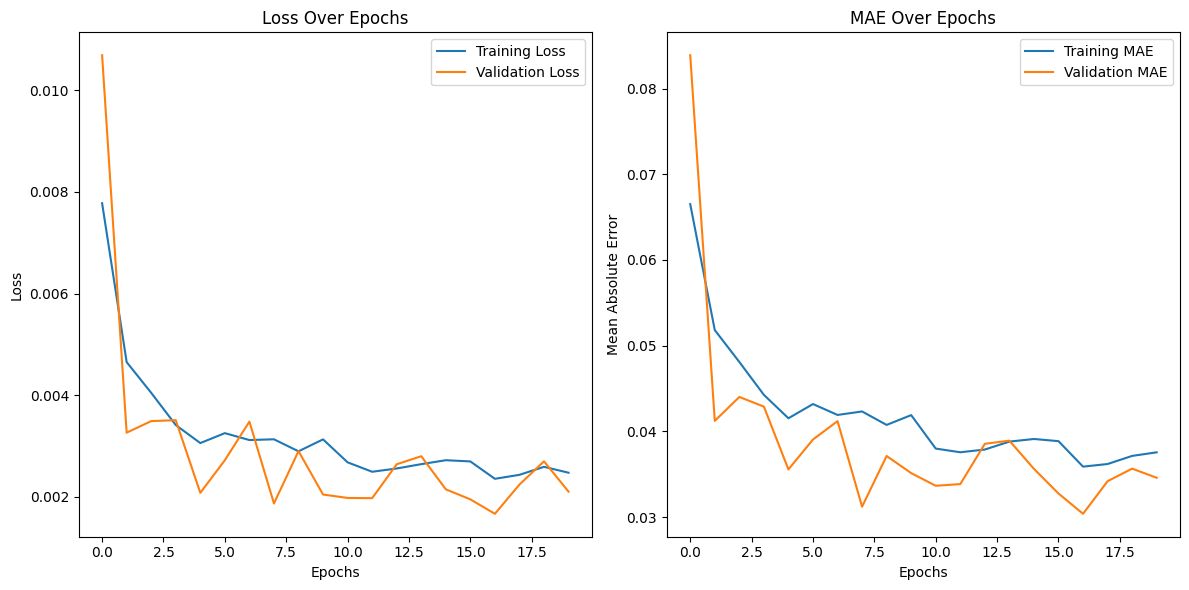

In [7]:
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.title('Loss Over Epochs')

plt.subplot(1, 2, 2)
plt.plot(history.history['mae'], label='Training MAE')
plt.plot(history.history['val_mae'], label='Validation MAE')
plt.xlabel('Epochs')
plt.ylabel('Mean Absolute Error')
plt.legend()
plt.title('MAE Over Epochs')

plt.tight_layout()
plt.show()

In [8]:
model.load_weights(checkpoint.filepath)

y_pred = model.predict(X_test)

mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

metrics_df = pd.DataFrame({
    "Metric": ["Mean Squared Error (MSE)", "Mean Absolute Error (MAE)", "R-squared (R2)"],
    "Value": [mse, mae, r2]
})

metrics_df

19/19 [==============================] - 0s 3ms/step


,Metric,Value
0,Mean Squared Error (MSE),0.001668
1,Mean Absolute Error (MAE),0.030395
2,R-squared (R2),0.875174


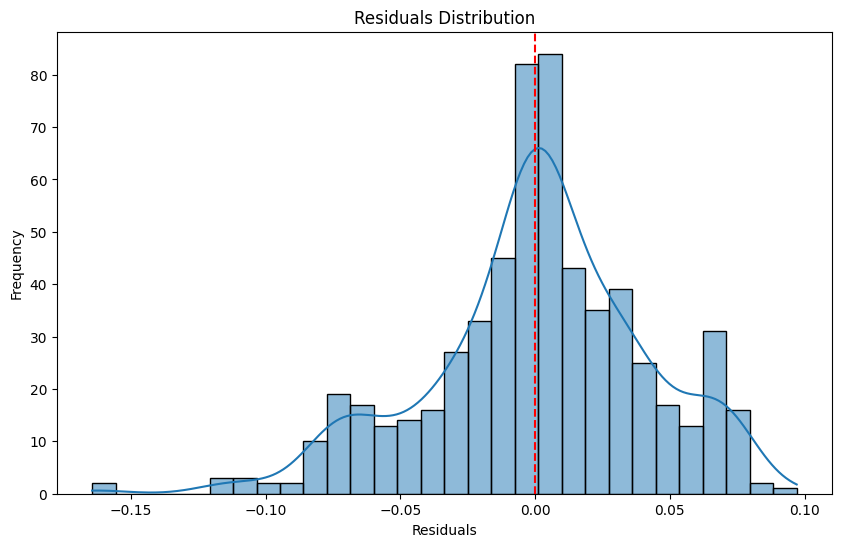

In [9]:
residuals = y_test - y_pred.flatten()
plt.figure(figsize=(10, 6))
sns.histplot(residuals, kde=True, bins=30)
plt.axvline(0, color='red', linestyle='--')
plt.xlabel('Residuals')
plt.ylabel('Frequency')
plt.title('Residuals Distribution')
plt.show()

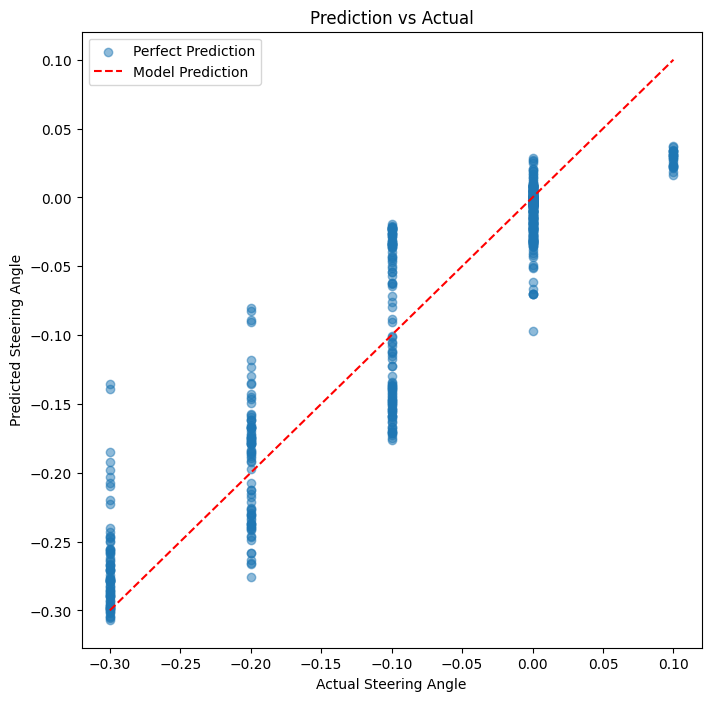

In [10]:
plt.figure(figsize=(8, 8))
plt.scatter(y_test, y_pred, alpha=0.5)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')
plt.xlabel('Actual Steering Angle')
plt.ylabel('Predicted Steering Angle')
plt.title('Prediction vs Actual')
plt.legend(['Perfect Prediction', 'Model Prediction'])
plt.show()

In [11]:
name = 'nn_512_256_128_64'
model_json = model.to_json()
with open(f'../models/{name}.json', 'w') as json_file:
    json.dump(json.loads(model_json), json_file, indent=4)

In [12]:
metadata = {
    "model_name": "nn_512_256_128_64",
    "model_path": f"../models/{name}.json",
    "timestamp": timestamp,
    "input_shape": list(X_train.shape[1:]),
    "output_shape": [1],
    "optimizer": {
        "type": "Adam",
        "learning_rate": 0.001
    },
    "loss_function": "mse",
    "metrics": ["mae"],
    "layers": [
        {"type": "BatchNormalization", "input_shape": list(X_train.shape[1:])},
        {"type": "Dense", "units": 512, "activation": "relu"},
        {"type": "Dense", "units": 256, "activation": "relu"},
        {"type": "Dense", "units": 128, "activation": "relu"},
        {"type": "Dense", "units": 64, "activation": "relu"},
        {"type": "Dense", "units": 1}
    ],
    "training": {
        "epochs": len(history.history['loss']),
        "batch_size": 32,
        "best_model_path": checkpoint.filepath,
        "final_training_loss": history.history['loss'][-1],
        "final_validation_loss": history.history['val_loss'][-1]
    },
    "evaluation": {
        "mse": mse,
        "mae": mae,
        "r2": r2
    }
}

try:
    with open("metadata.jsonl", "r+") as f:
        lines = f.readlines()
        if json.dumps(metadata) + "\n" not in lines:
            f.write(json.dumps(metadata) + "\n")
except FileNotFoundError:
    with open("metadata.jsonl", "w") as f:
        f.write(json.dumps(metadata) + "\n")

In [13]:
with open("metadata.jsonl", "r") as f:
    lines = f.readlines()

print(json.dumps(json.loads(lines[-1]), indent=4))

{
    "model_name": "nn_512_256_128_64",
    "model_path": "../models/nn_512_256_128_64.json",
    "timestamp": "20250522_195025",
    "input_shape": [
        18
    ],
    "output_shape": [
        1
    ],
    "optimizer": {
        "type": "Adam",
        "learning_rate": 0.001
    },
    "loss_function": "mse",
    "metrics": [
        "mae"
    ],
    "layers": [
        {
            "type": "BatchNormalization",
            "input_shape": [
                18
            ]
        },
        {
            "type": "Dense",
            "units": 512,
            "activation": "relu"
        },
        {
            "type": "Dense",
            "units": 256,
            "activation": "relu"
        },
        {
            "type": "Dense",
            "units": 128,
            "activation": "relu"
        },
        {
            "type": "Dense",
            "units": 64,
            "activation": "relu"
        },
        {
            "type": "Dense",
            "units": 1
      